In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import io
import requests
bank= pd.read_csv('bank-full.csv', header=0, sep=';', quotechar='"')

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df= bank

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
cat_col = [n for n in df.columns if df[n].dtypes == 'object']

In [ ]:

for col in cat_col:
    print(col, '\n\n')
    print(df[col].value_counts())
    print("======================" * 4)

job 


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
marital 


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
education 


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
default 


no     44396
yes      815
Name: default, dtype: int64
housing 


yes    25130
no     20081
Name: housing, dtype: int64
loan 


no     37967
yes     7244
Name: loan, dtype: int64
contact 


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
month 


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
poutcome 


unkno

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.get_dummies(df,columns = ['job','marital','education','default',
                                   'housing','loan','month',
                                   'day','poutcome'], drop_first = True)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = df.apply(le.fit_transform)
bank_cust.head()

,age,balance,contact,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
0,40,3036,2,261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26,945,2,151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15,918,2,76,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,29,2420,2,92,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,15,917,2,198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = bank_cust.loc[:,df.columns != 'y']
y = bank_cust.loc[:,df.columns == 'y']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 , random_state = 42)

In [ ]:
#print lenght of both test and train set
print('shape of X_train : ',len(X_train), '\nshape of y_train : ',len(y_train))
print('\nshape of X_test  : ',len(X_test), '\nshape of y_test  : ',len(y_test))

shape of X_train :  31647 
shape of y_train :  31647

shape of X_test  :  13564 
shape of y_test  :  13564


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.9035611590356116

In [ ]:
clf.score(X_test,y_test)

0.9017988793866116

In [ ]:
clf.fit(X_test,y_test)

LogisticRegression(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[11646,   320],
       [  995,   603]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.65      0.38      0.48      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df2= bank

In [ ]:
data = pd.get_dummies(df2,columns = ['job','marital','education','default','balance','contact',
                                   'housing','loan','month',
                                   'day','poutcome'], drop_first = True)

In [ ]:
df.shape

(45211, 71)

In [ ]:
data.shape

(45211, 7238)

In [ ]:
df.corr()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,0.097783,-0.004648,0.004760,-0.023758,0.001288,-0.044002,0.021792,0.086650,-0.023571,...,0.002169,-0.009247,-0.015103,-0.015625,0.000133,0.003268,0.023785,-0.022967,0.035526,-0.000816
balance,0.097783,1.000000,0.021560,-0.014578,0.003435,0.016674,-0.048757,0.009642,0.001661,0.067797,...,-0.001784,-0.011422,-0.021177,-0.023241,-0.014767,0.003737,-0.000306,0.008466,0.035240,-0.030271
duration,-0.004648,0.021560,1.000000,-0.084570,-0.001565,0.001203,0.009637,-0.001327,-0.008046,-0.008323,...,-0.003804,-0.012397,-0.019204,-0.025879,-0.012474,0.013803,-0.035976,-0.001958,0.042389,-0.003491
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.088628,-0.032855,0.008986,0.002128,0.003097,0.016686,...,0.038934,0.030095,0.040255,0.088874,0.019425,0.014869,0.178835,-0.020107,-0.057486,0.107965
pdays,-0.023758,0.003435,-0.001565,-0.088628,1.000000,0.454820,0.020063,-0.014203,-0.031350,-0.007871,...,-0.022203,-0.024228,-0.038085,-0.046785,-0.009359,-0.031359,-0.038326,0.389791,0.228539,-0.869962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
day_30,0.003268,0.003737,0.013803,0.014869,-0.031359,-0.011752,-0.017391,-0.002378,0.005221,0.002200,...,-0.026063,-0.028994,-0.030204,-0.038905,-0.037953,1.000000,-0.022752,0.014243,0.008522,0.009341
day_31,0.023785,-0.000306,-0.035976,0.178835,-0.038326,-0.022476,0.000722,0.001939,-0.000727,0.001142,...,-0.016527,-0.018385,-0.019153,-0.024670,-0.024067,-0.022752,1.000000,-0.018122,-0.017138,0.040797
poutcome_other,-0.022967,0.008466,-0.001958,-0.020107,0.389791,0.306615,0.001342,-0.013506,-0.016769,0.002223,...,-0.011760,-0.009822,-0.016286,-0.019016,-0.004659,0.014243,-0.018122,1.000000,-0.038300,-0.435903
poutcome_success,0.035526,0.035240,0.042389,-0.057486,0.228539,0.201424,-0.053074,-0.019111,-0.009375,0.021453,...,0.016337,0.005274,0.006755,-0.015087,-0.015537,0.008522,-0.017138,-0.038300,1.000000,-0.393525


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Columns: 7238 entries, age to poutcome_unknown
dtypes: int64(5), object(1), uint8(7232)
memory usage: 313.9+ MB


In [ ]:
do = bank

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

knn_acc = accuracy_score(y_test, y_pred)
dtree_acc = accuracy_score(y_test, y_pred)

print("KNN accuracy:", knn_acc)
print("D-Tree accuracy:", dtree_acc)

KNN accuracy: 0.8979652020053082
D-Tree accuracy: 0.8979652020053082


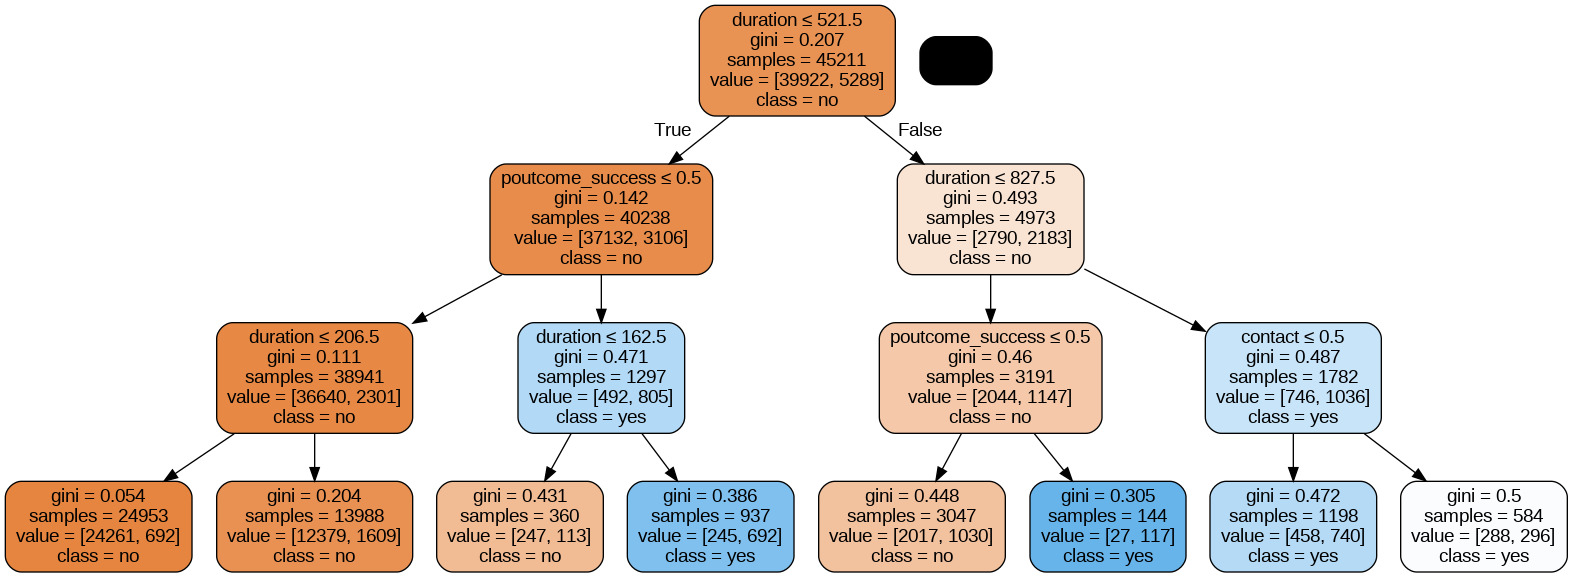

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
from IPython.display import Image  
import pydotplus
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X, y)

dot_data = export_graphviz(dtree, out_file=None, 
                           feature_names=X.columns.values,  
                           class_names=['no', 'yes'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

# Train the Random Forest classifier on the training data
rf.fit(X_train, y_train)

# Use the trained Random Forest classifier to make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.904379239162489


In [ ]:
my_data = bank

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
my_data['job']      = labelencoder_X.fit_transform(my_data['job']) 
my_data['marital']  = labelencoder_X.fit_transform(my_data['marital']) 
my_data['education']= labelencoder_X.fit_transform(my_data['education']) 
my_data['default']  = labelencoder_X.fit_transform(my_data['default']) 
my_data['housing']  = labelencoder_X.fit_transform(my_data['housing']) 
my_data['loan']     = labelencoder_X.fit_transform(my_data['loan']) 

my_data['contact']     = labelencoder_X.fit_transform(my_data['contact']) 
my_data['month']       = labelencoder_X.fit_transform(my_data['month']) 

In [ ]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
    return dataframe

age(my_data);

In [ ]:
my_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,unknown,no
2,2,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,no
4,2,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,unknown,no


In [ ]:
print(my_data.shape)
my_data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,unknown,no
2,2,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,no
4,2,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,unknown,no


In [ ]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(my_data);

In [ ]:
my_data.loc[(my_data['pdays'] == 999), 'pdays'] = 1
my_data.loc[(my_data['pdays'] > 0) & (my_data['pdays'] <= 10), 'pdays'] = 2
my_data.loc[(my_data['pdays'] > 10) & (my_data['pdays'] <= 20), 'pdays'] = 3
my_data.loc[(my_data['pdays'] > 20) & (my_data['pdays'] != 999), 'pdays'] = 4 
my_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,unknown,no
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,unknown,no
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,unknown,no


In [ ]:
my_data['poutcome'].replace(['unknown', 'failure','other', 'success'], [1,2,3,4], inplace  = True)

In [ ]:
print(my_data.shape)
my_data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,1,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,1,no
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,1,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,1,no
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,1,no


In [ ]:
Final_data=my_data
print(Final_data.shape)
Final_data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,1,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,1,no
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,1,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,1,no
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,1,no


In [ ]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
X = Final_data.values[:,0:15]  ## Features
Y = Final_data.values[:,16]  ## Target.values[:,10]  ## Target

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
NB=accuracy_score(Y_test, Y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',NB)

Accuracy_score: 0.848938366263639


In [ ]:
from sklearn import metrics
print('Confusion_matrix of NB:')
print(metrics.confusion_matrix(Y_test,Y_pred))

Confusion_matrix of NB:
[[10703  1327]
 [  722   812]]


In [ ]:
final_data = Final_data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
final_data.shape

(45211, 15)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_std = pd.DataFrame(StandardScaler().fit_transform(final_data))
X_std.columns = final_data.columns

In [ ]:
my_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,1,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,1,no
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,1,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,1,no
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,1,no


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = np.array(my_data.iloc[:,1:16]) 
y = np.array(my_data['y'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(36168, 15)
(36168,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

#Neighbors
neighbors = np.arange(0,25)

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(accuracy_score(y_test, y_pred))

0.836669246931328
0.8823399314386818
0.8706181576910318
0.8824505142098861
0.8805706070994139
0.8838880902355413
0.8830034280659074
0.8841092557779497
0.8834457591507243
0.8843304213203583
0.8841092557779497
0.8839986730067455
0.8836669246931328
0.8842198385491541
0.8842198385491541
0.8842198385491541
0.8839986730067455
0.8841092557779497
0.8841092557779497
0.8841092557779497
0.8839986730067455
0.8843304213203583
0.8843304213203583
0.8843304213203583
0.8841092557779497


In [ ]:
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [ ]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)


The optimal number of neighbors is 23


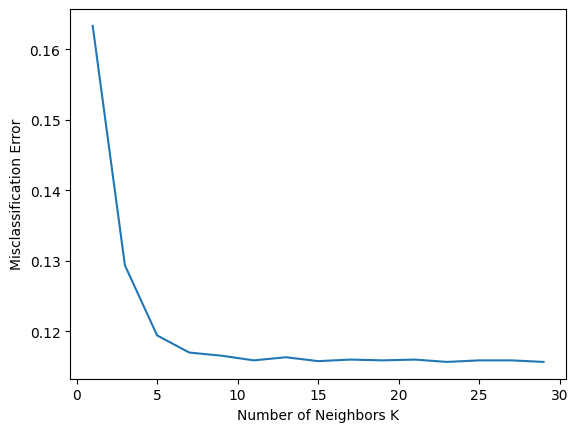

In [ ]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
#Use k=23 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 23)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
KNN=accuracy_score(y_test, y_pred)   #Accuracy of KNN model
print('Accuracy_score:',KNN)    

Accuracy_score: 0.8843304213203583


In [ ]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion_matrix:
[[7997    0]
 [1046    0]]


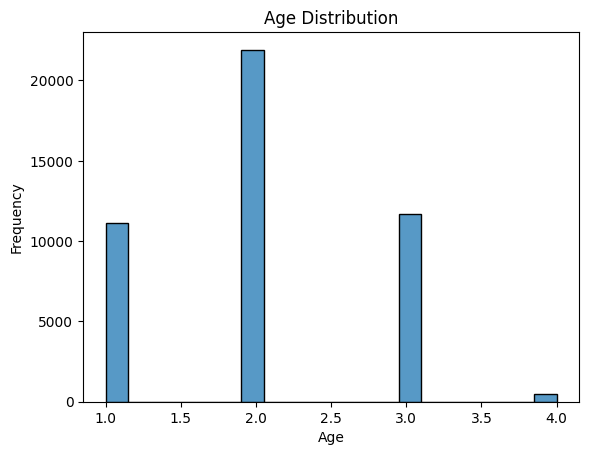

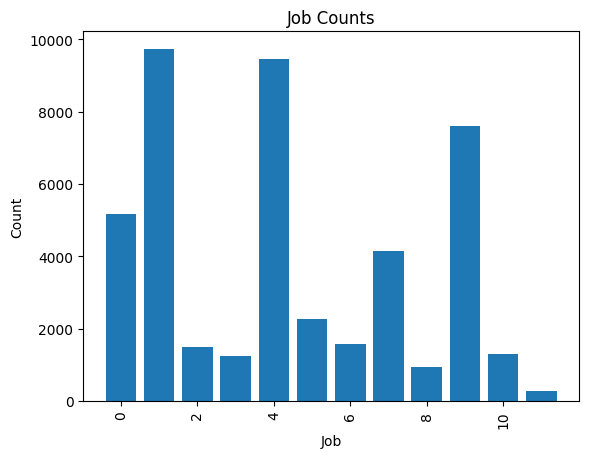

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Histogram of age distribution
sns.histplot(data=my_data, x='age', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar chart of job counts
job_counts = my_data['job'].value_counts()
plt.bar(job_counts.index, job_counts.values)
plt.title('Job Counts')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()